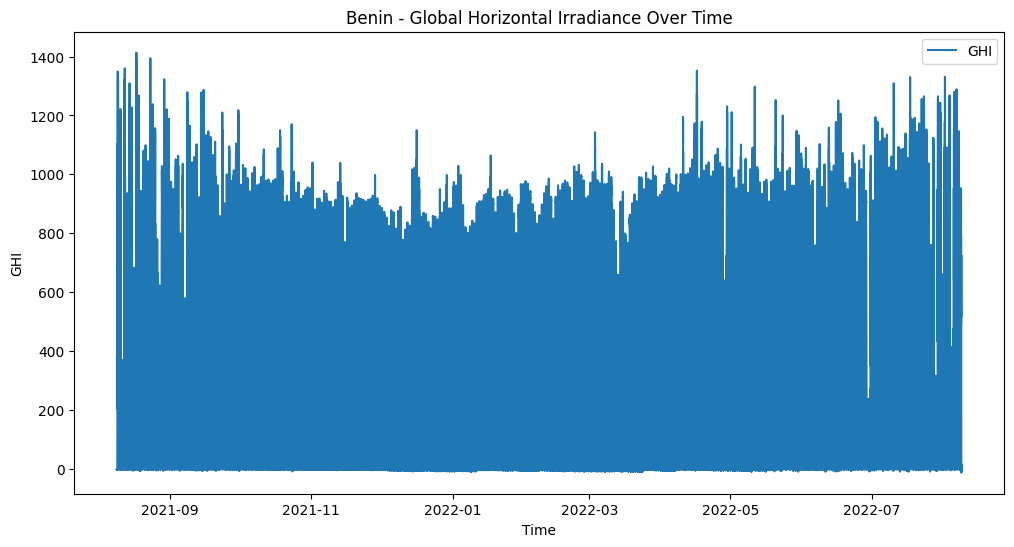

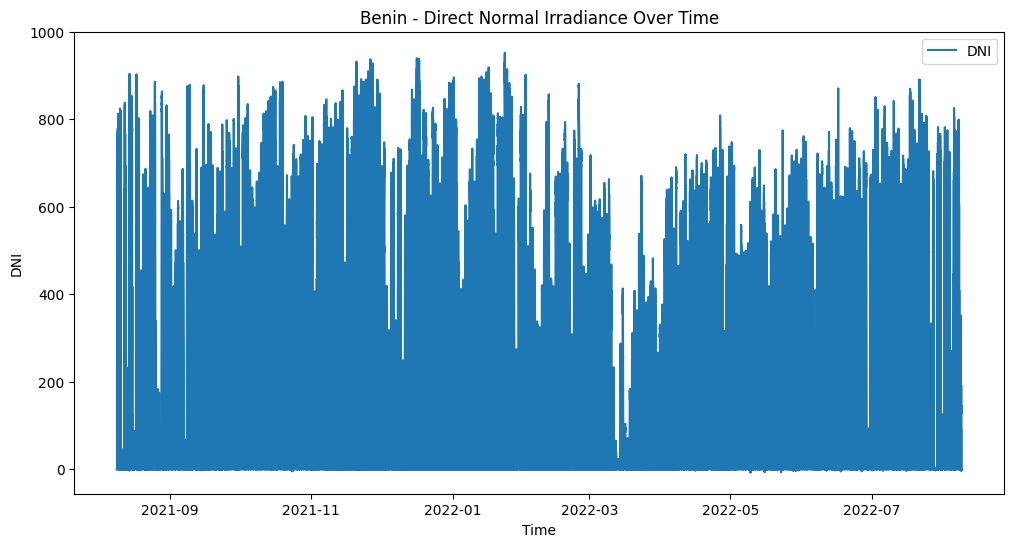

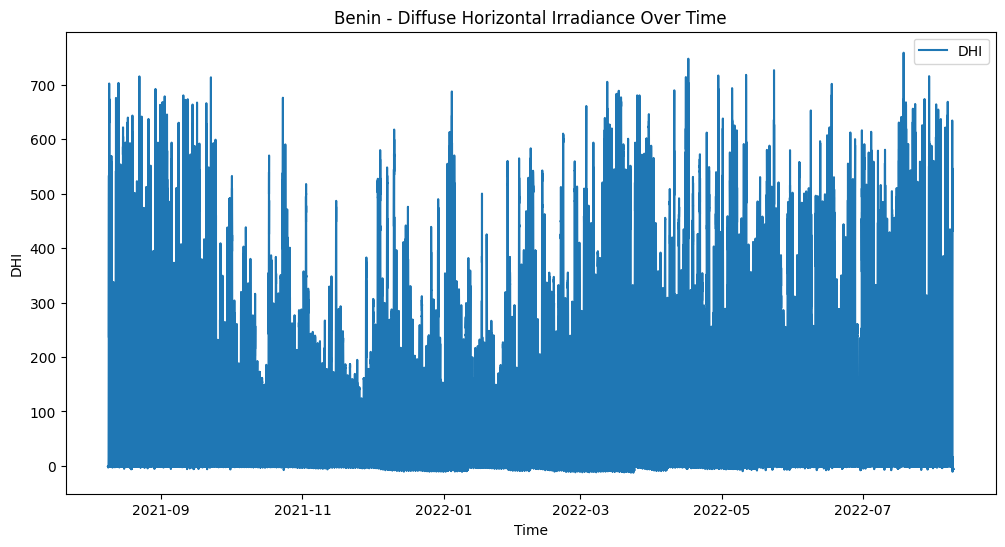

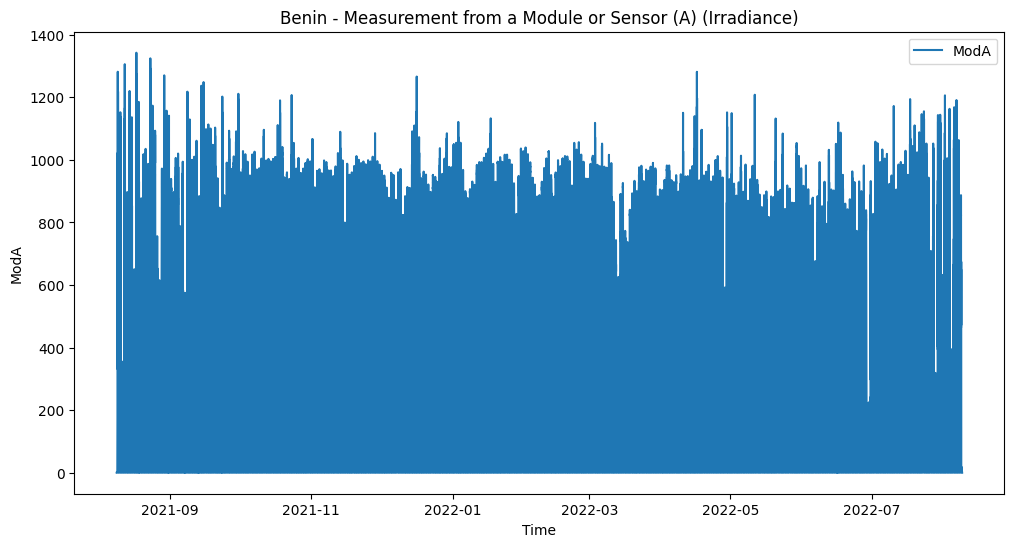

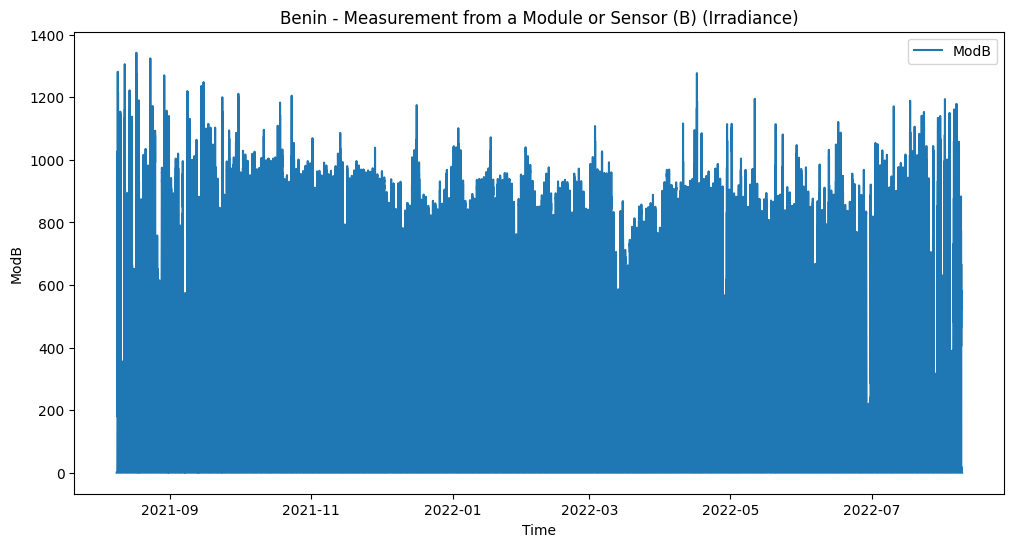

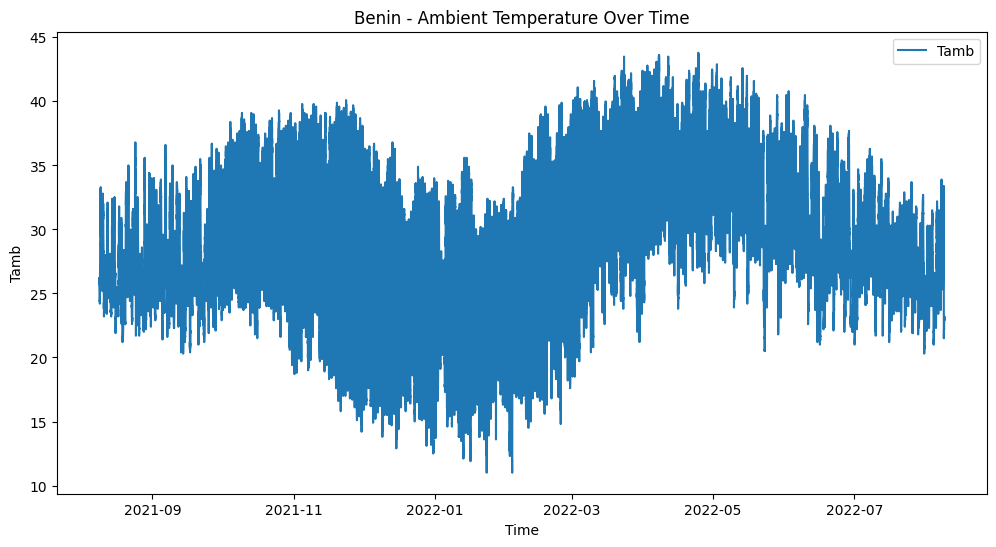

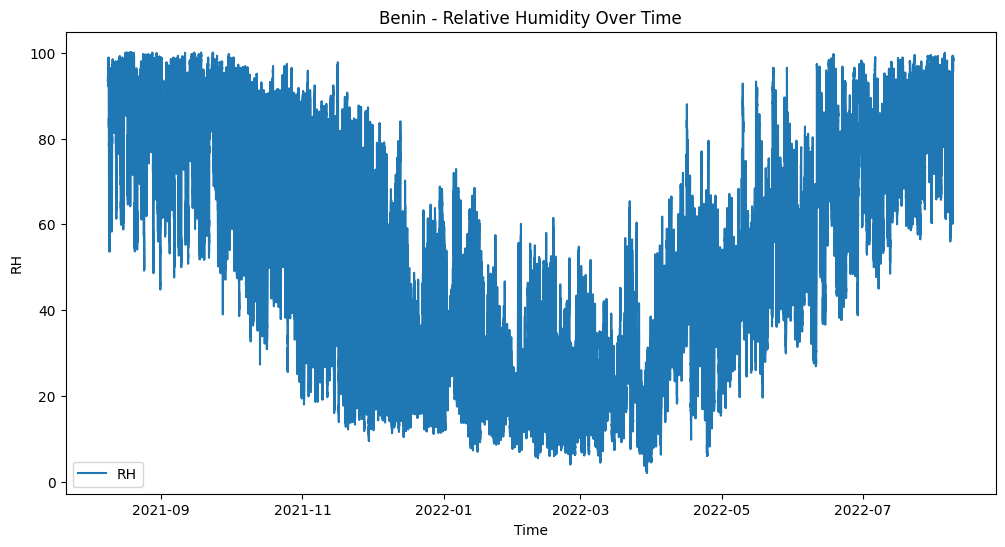

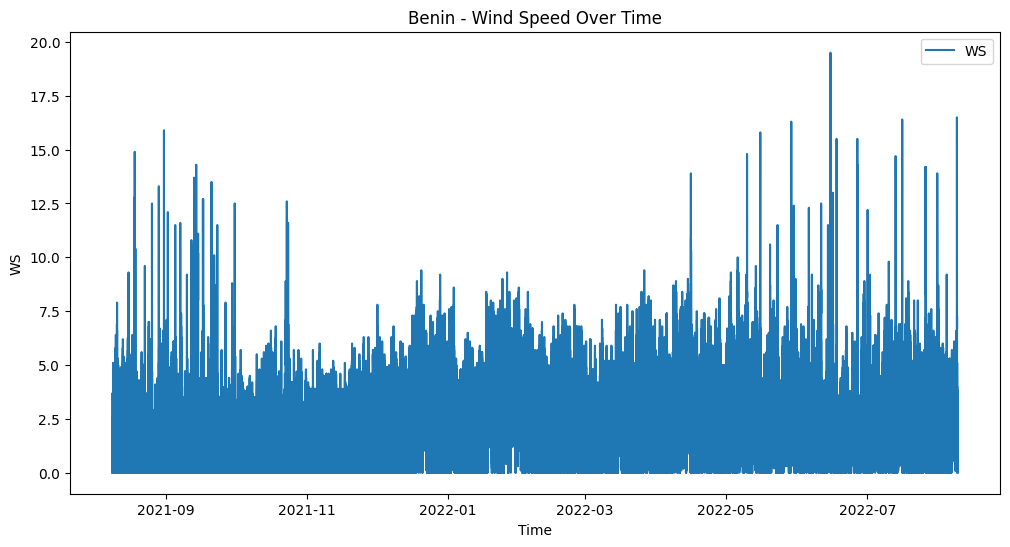

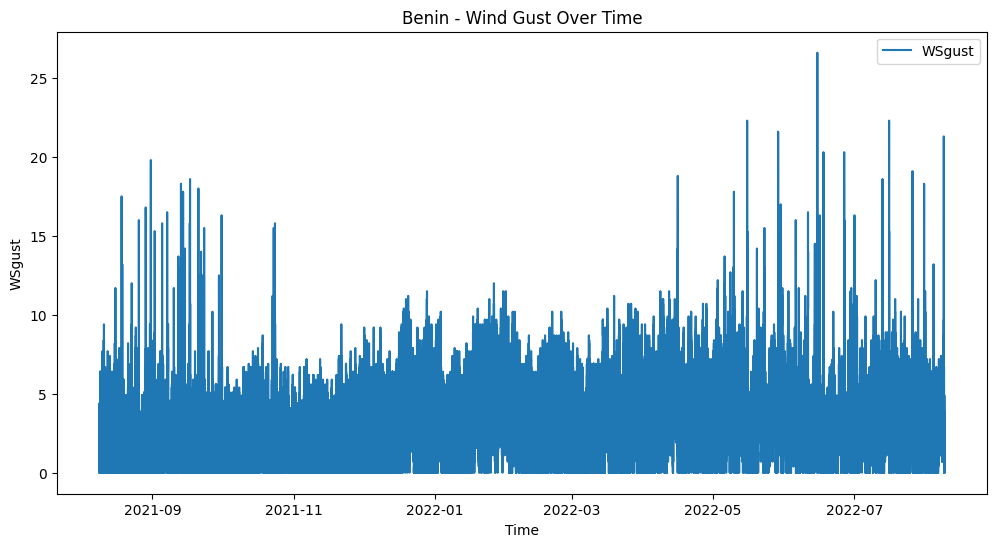

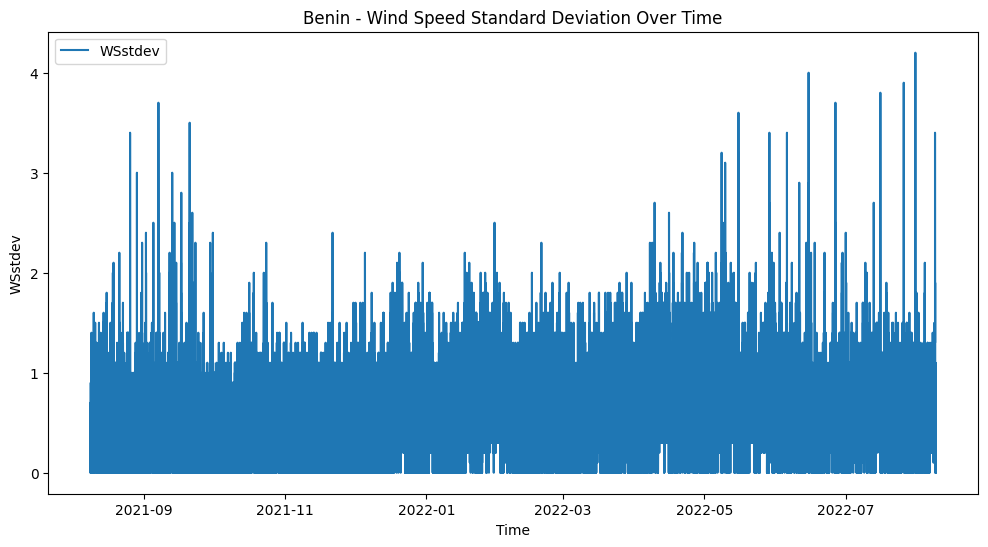

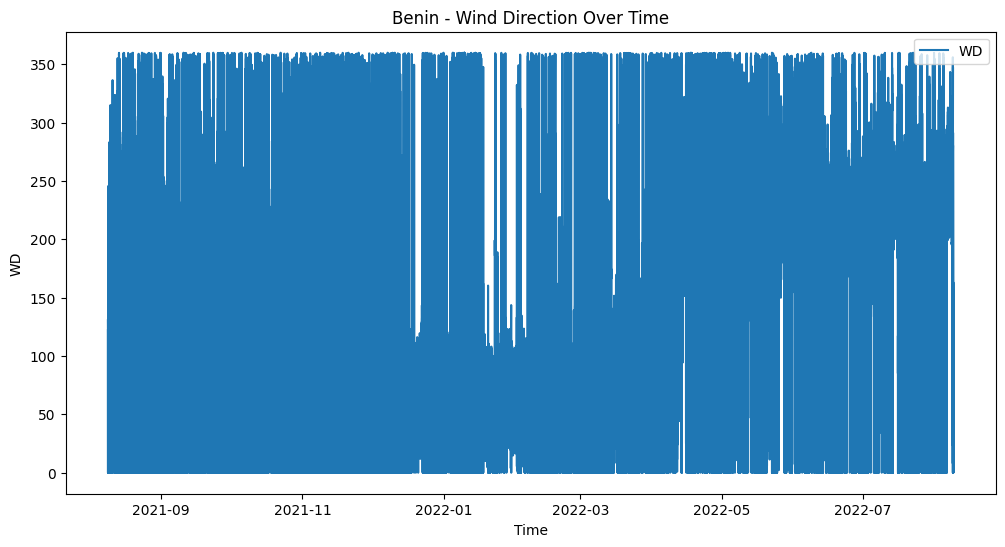

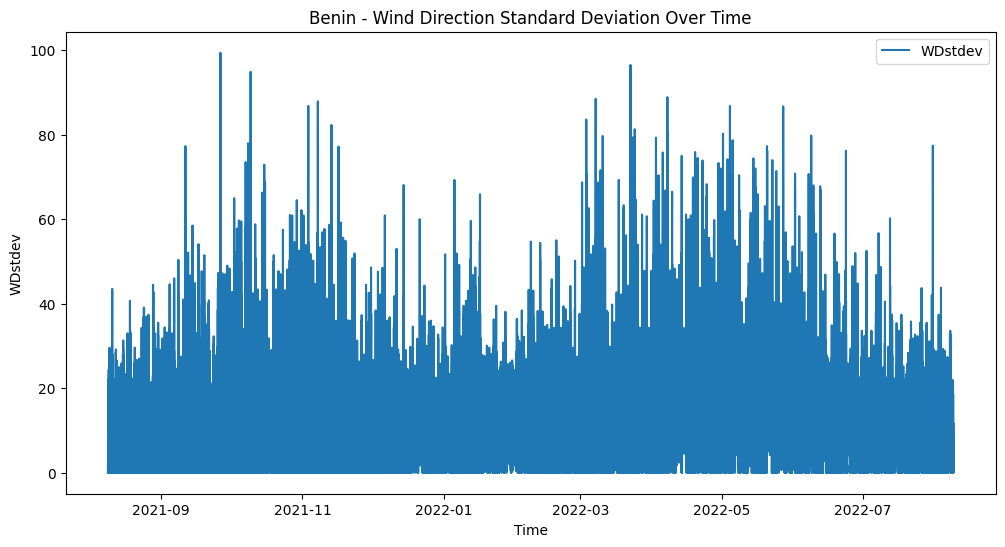

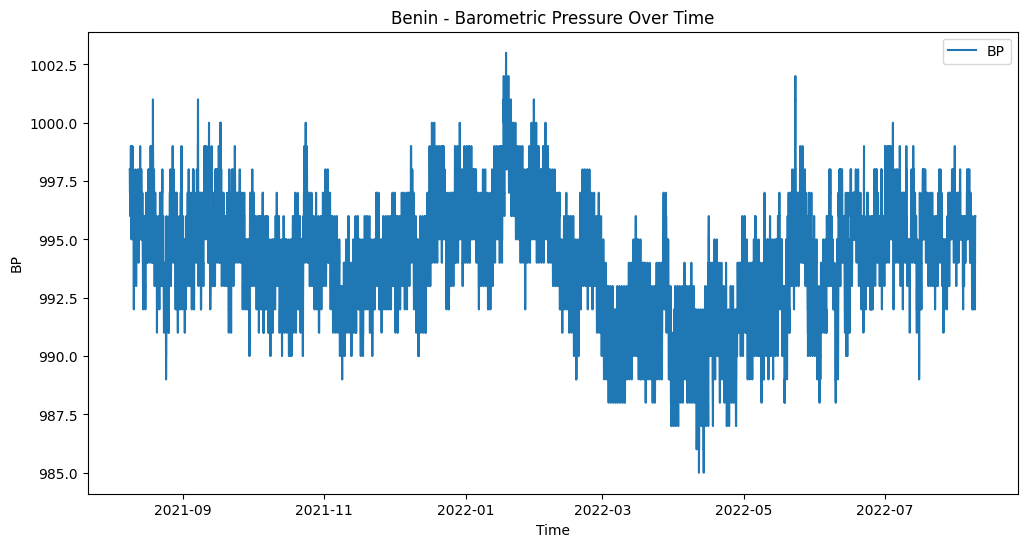

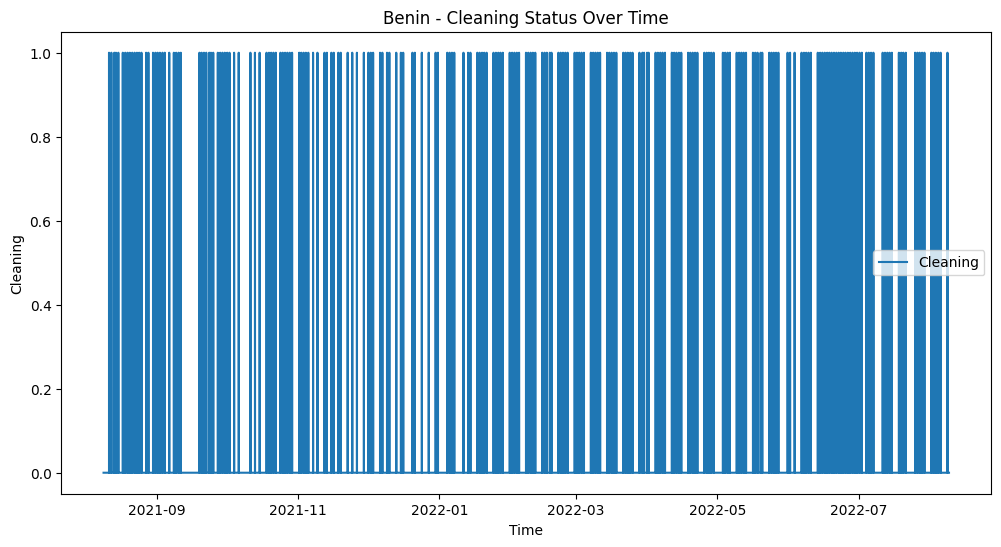

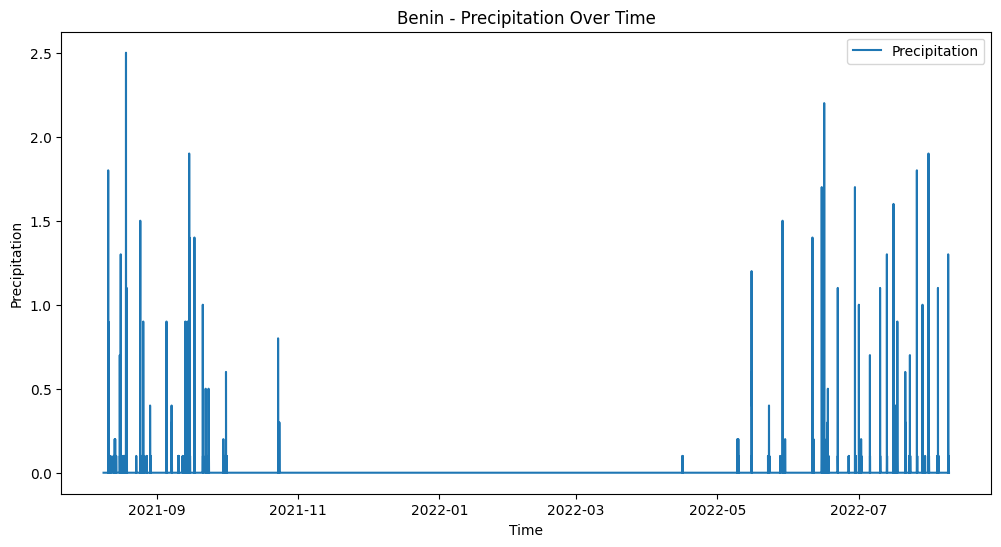

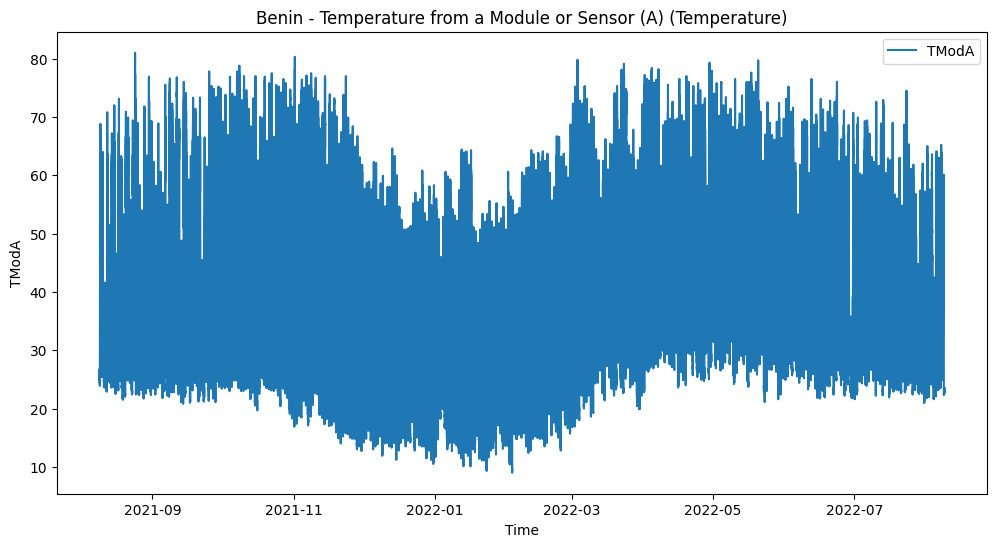

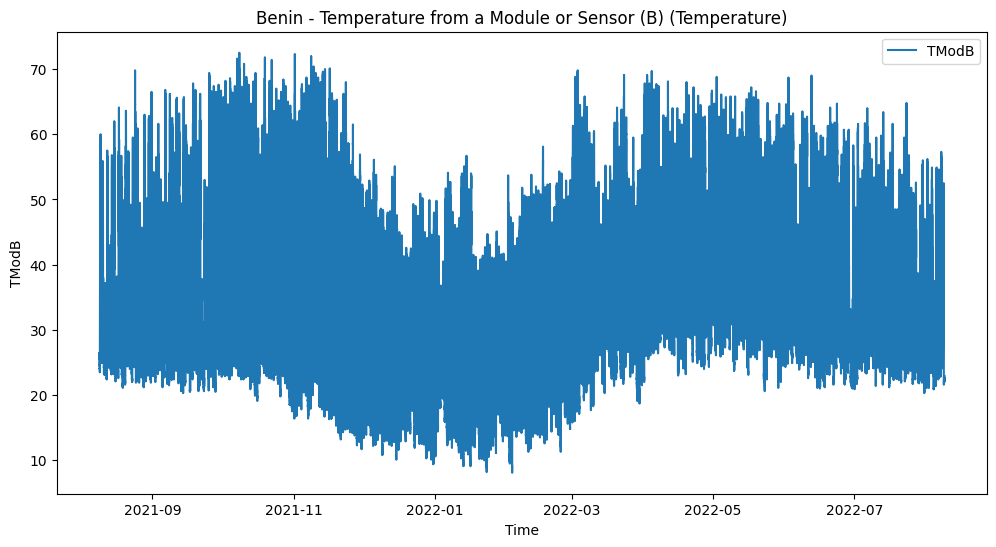

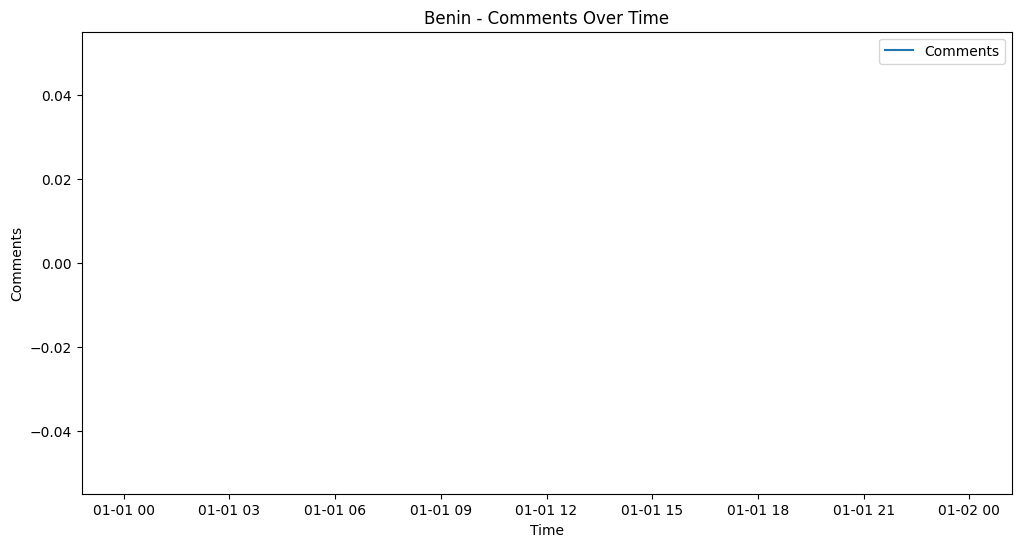

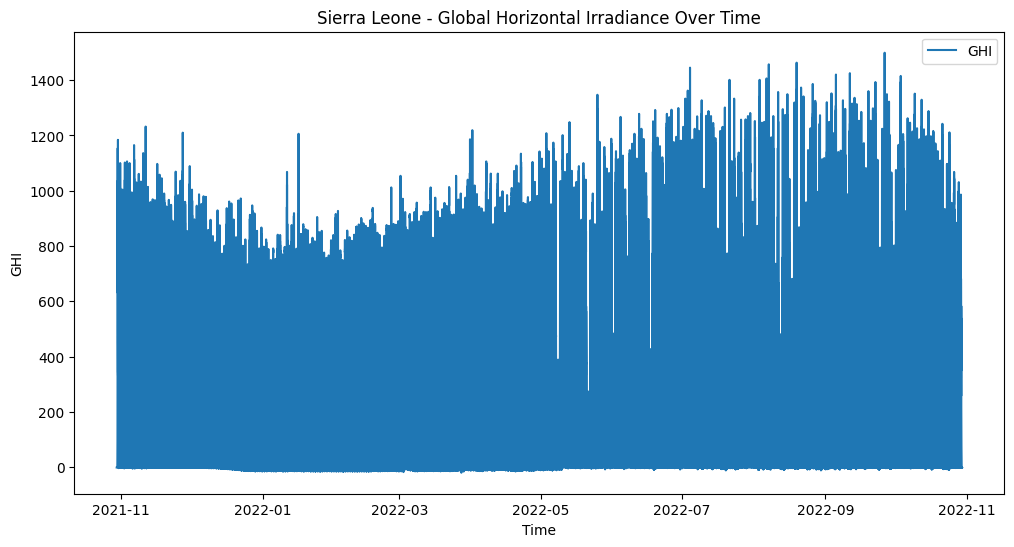

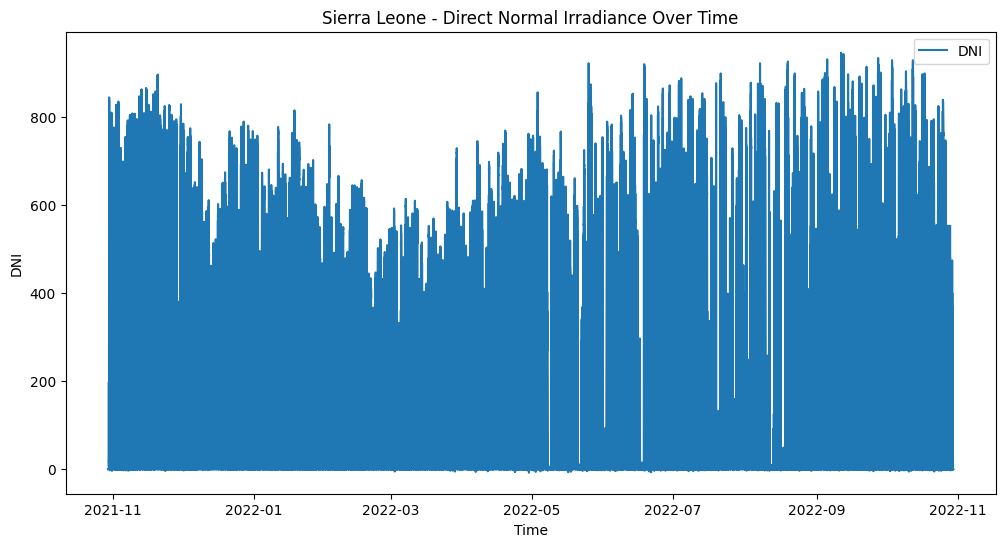

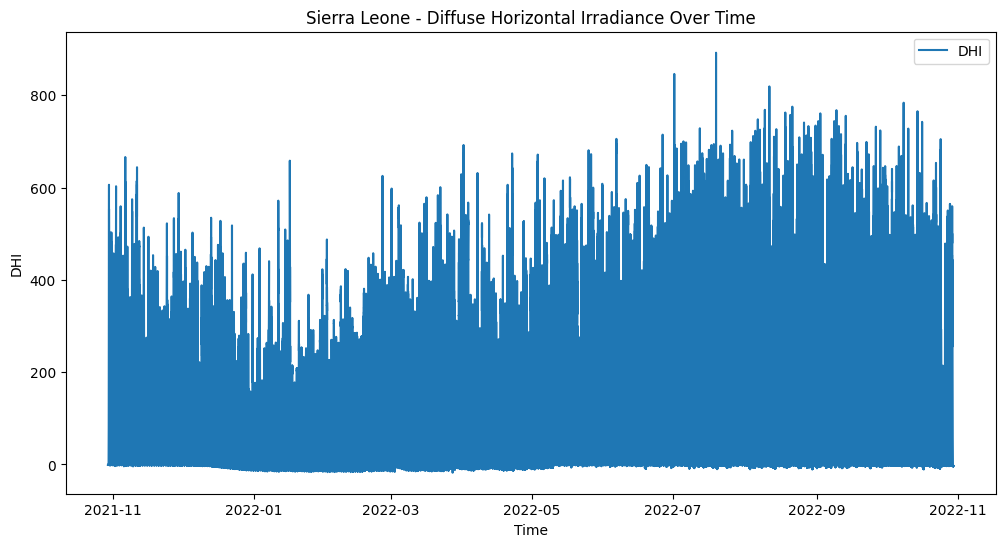

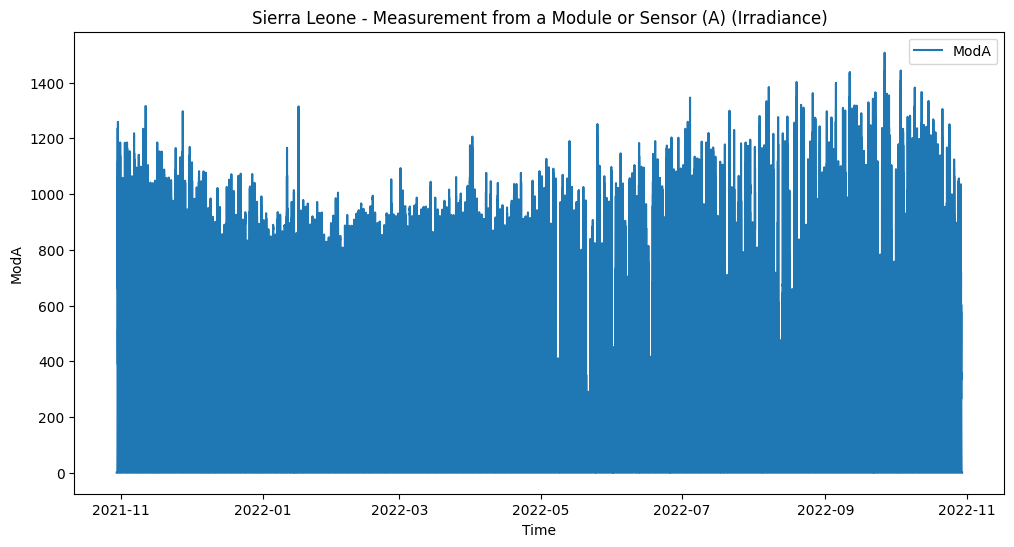

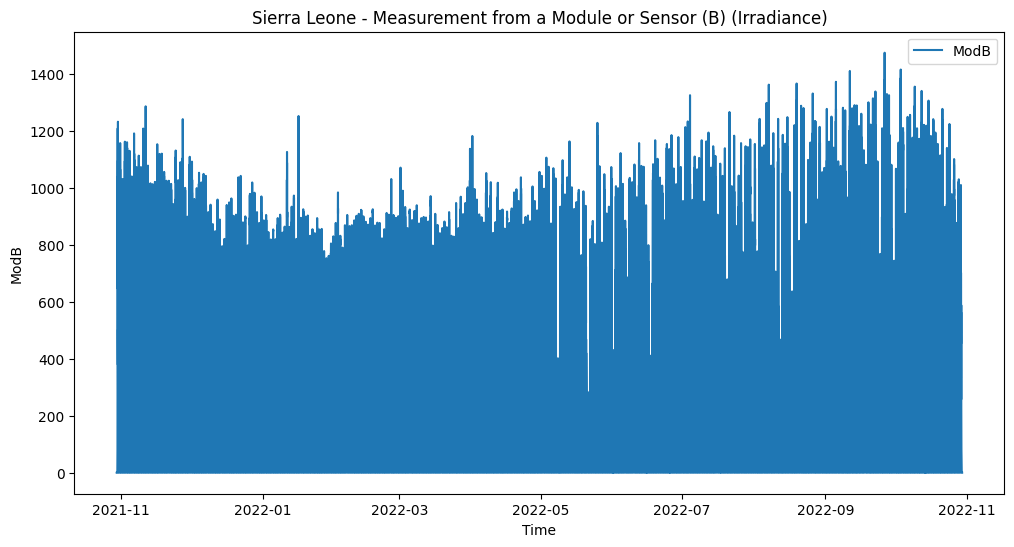

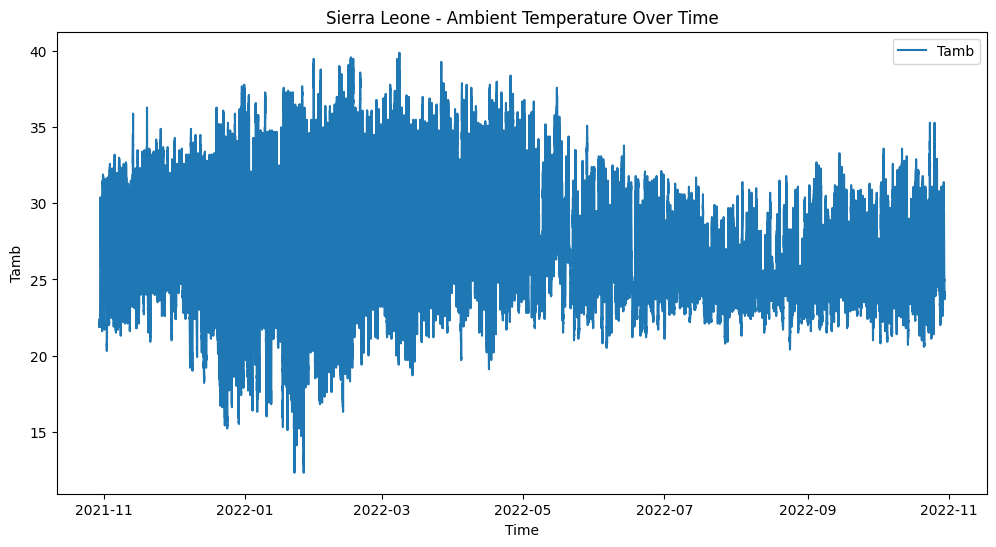

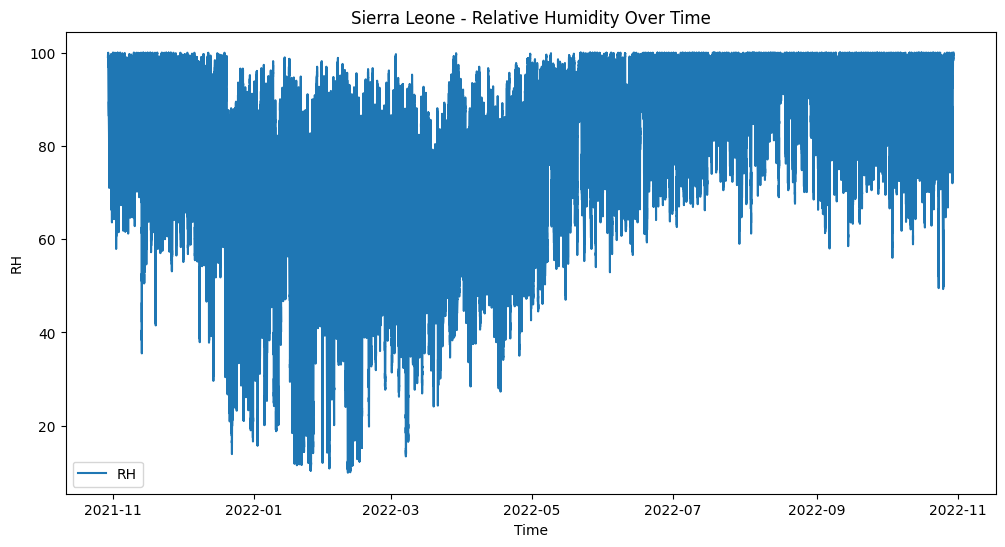

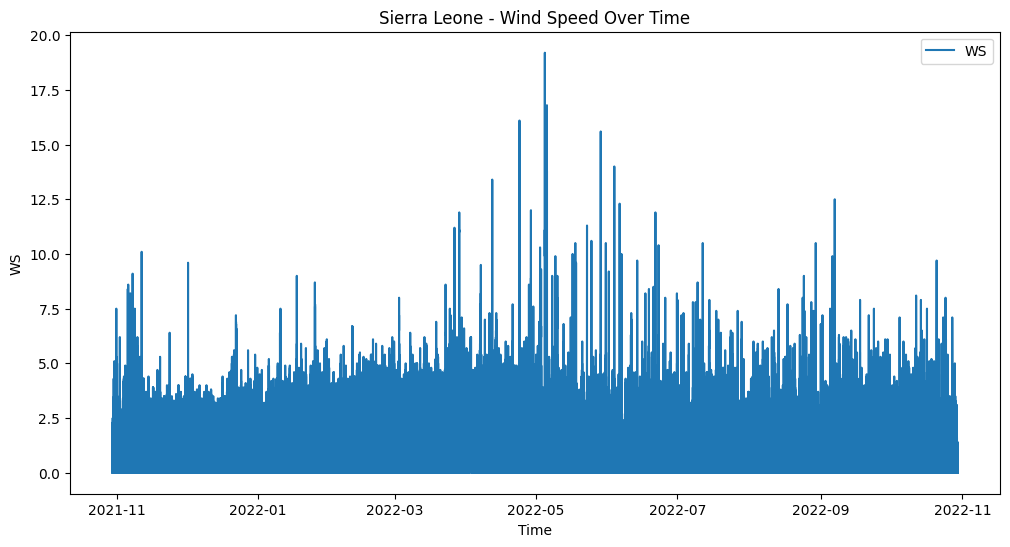

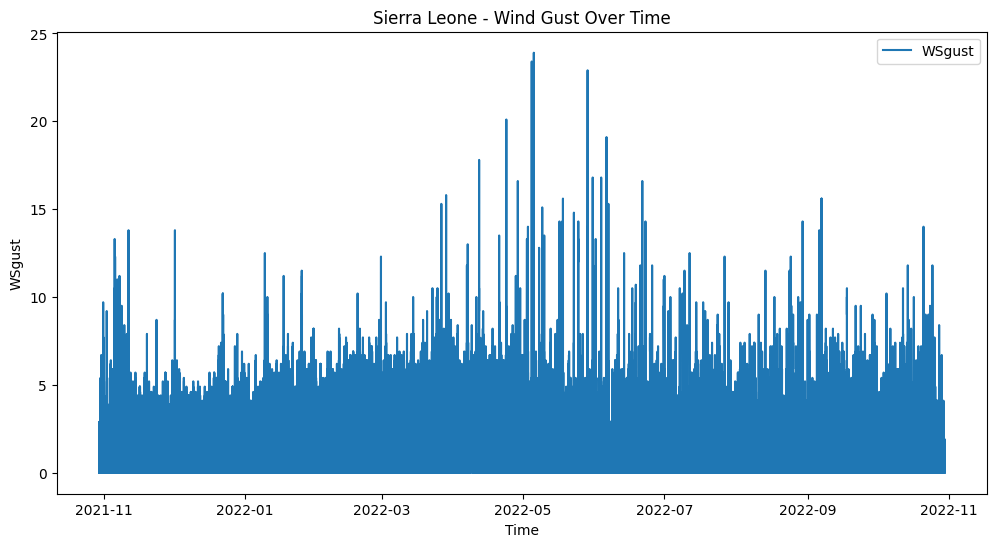

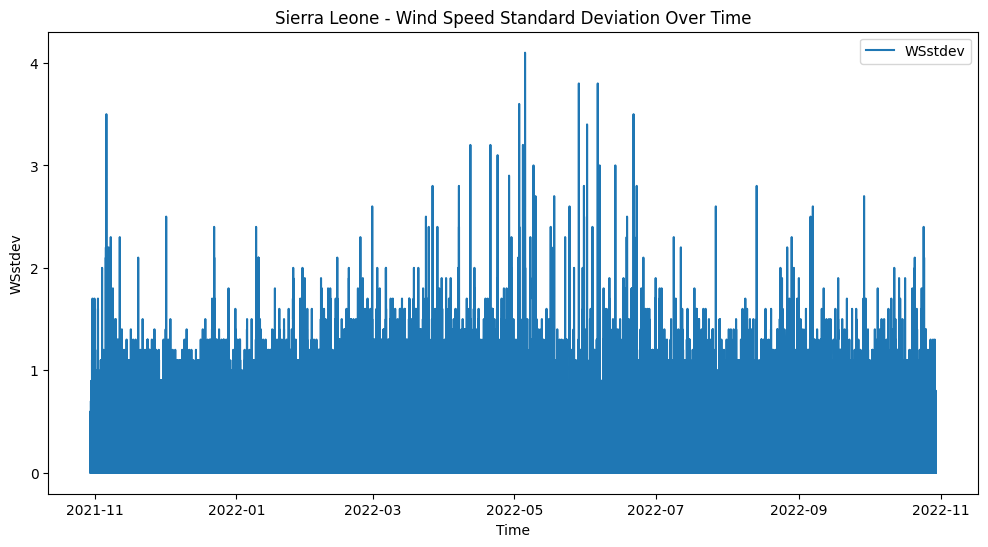

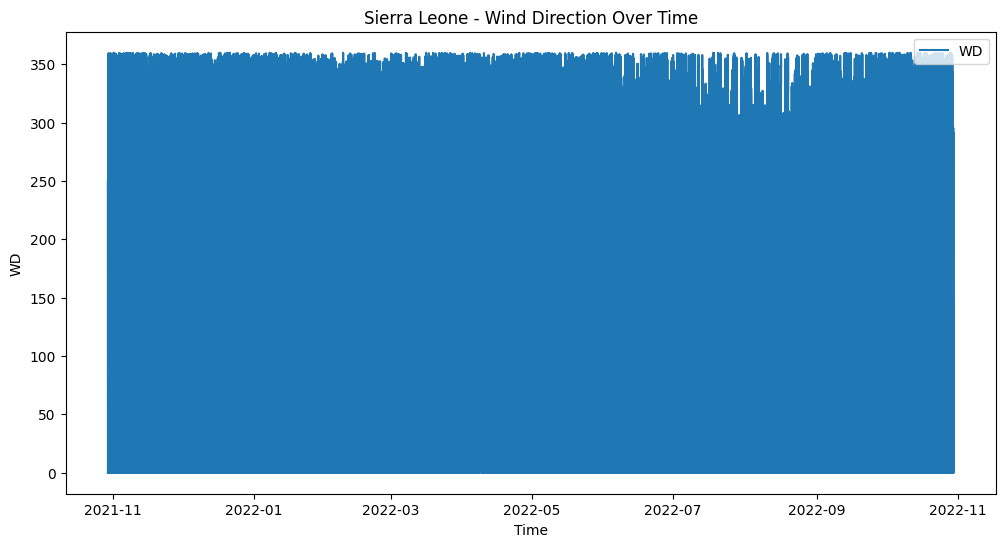

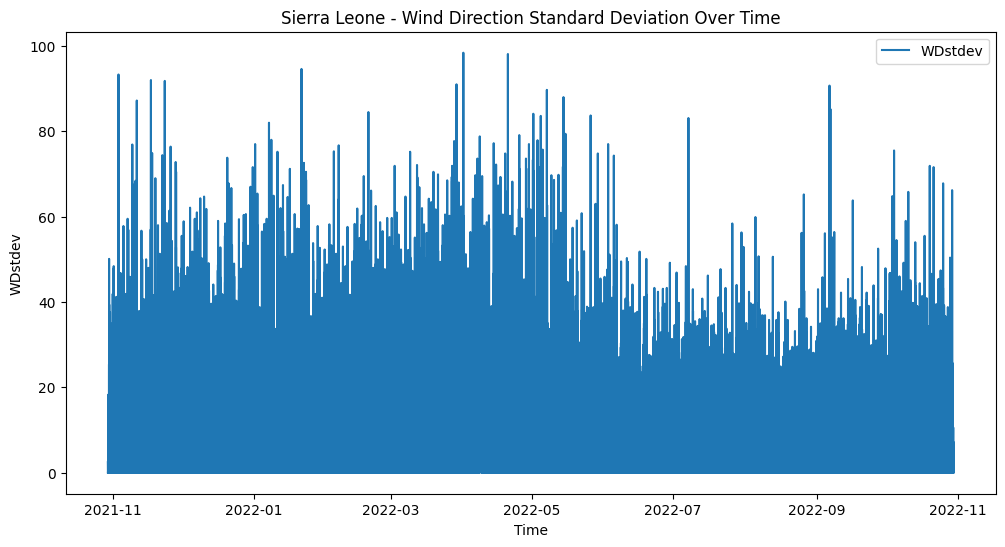

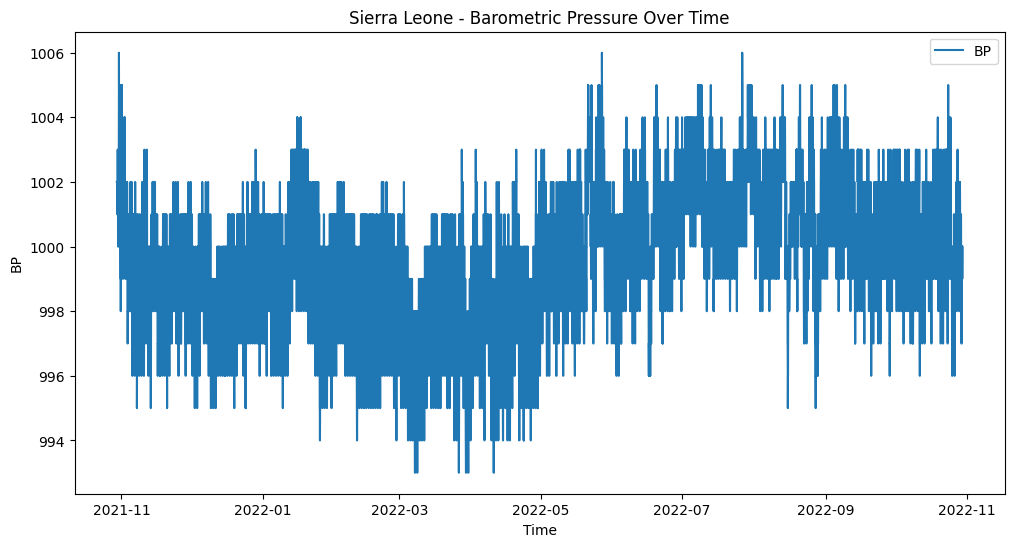

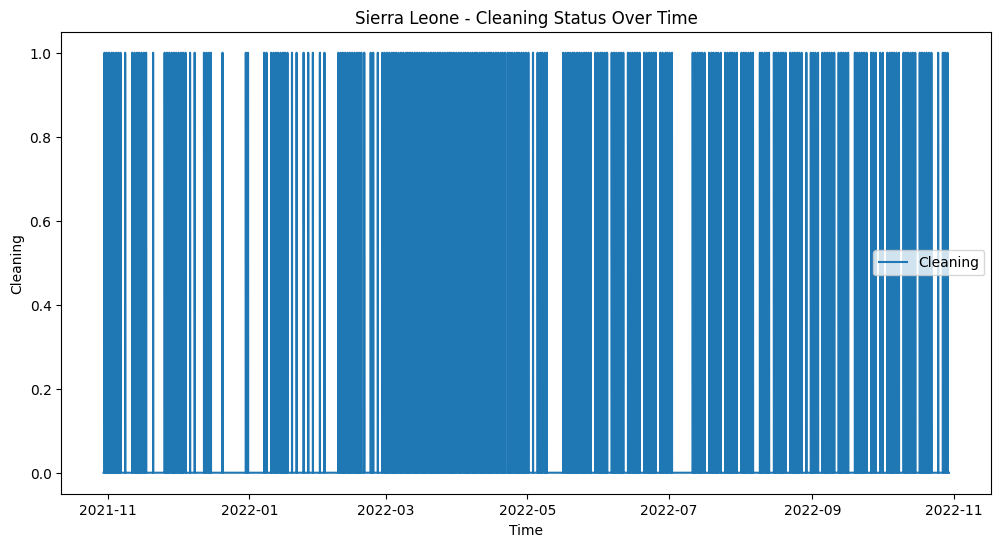

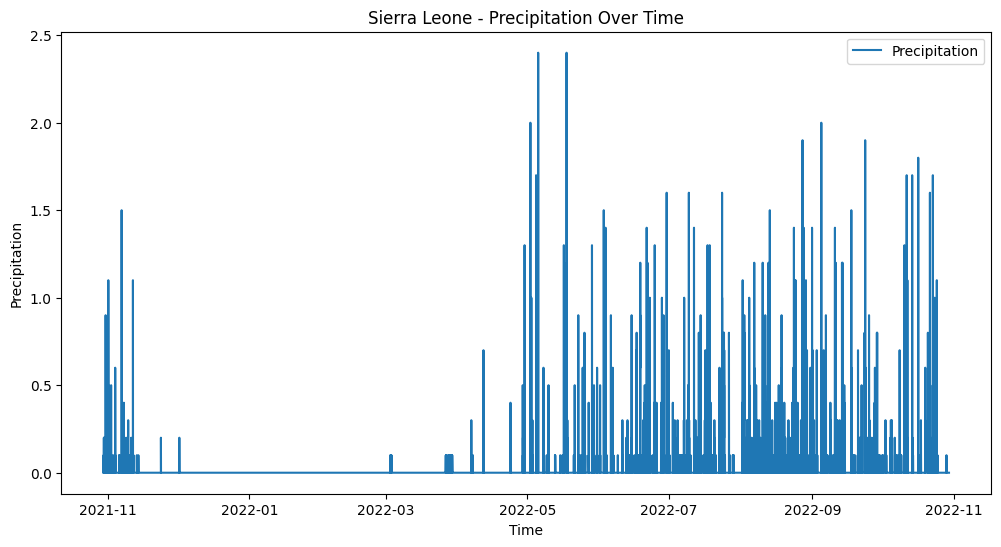

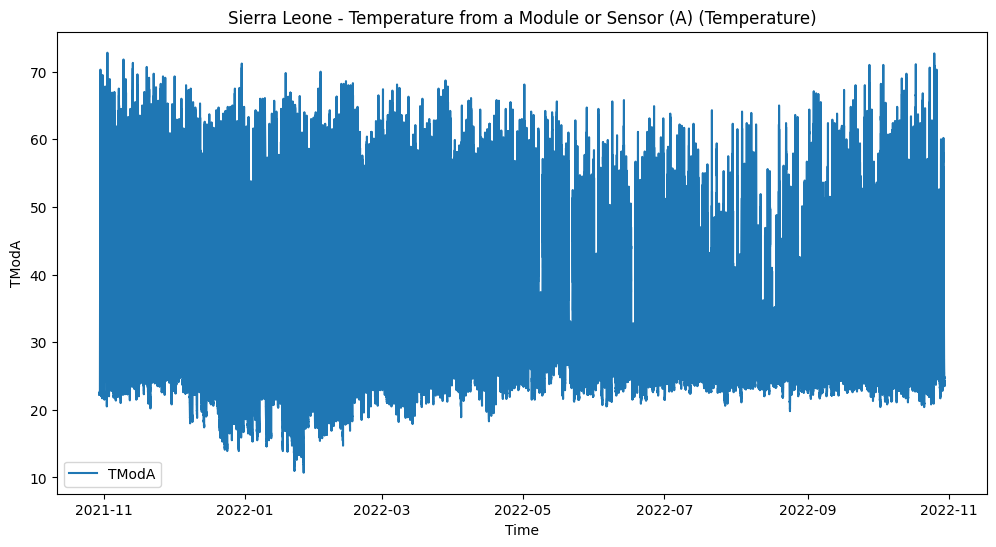

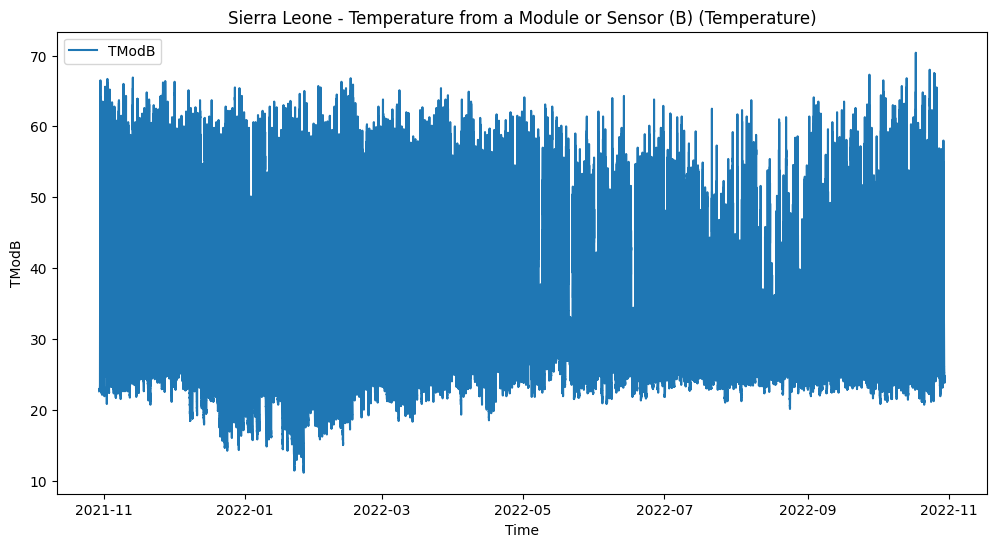

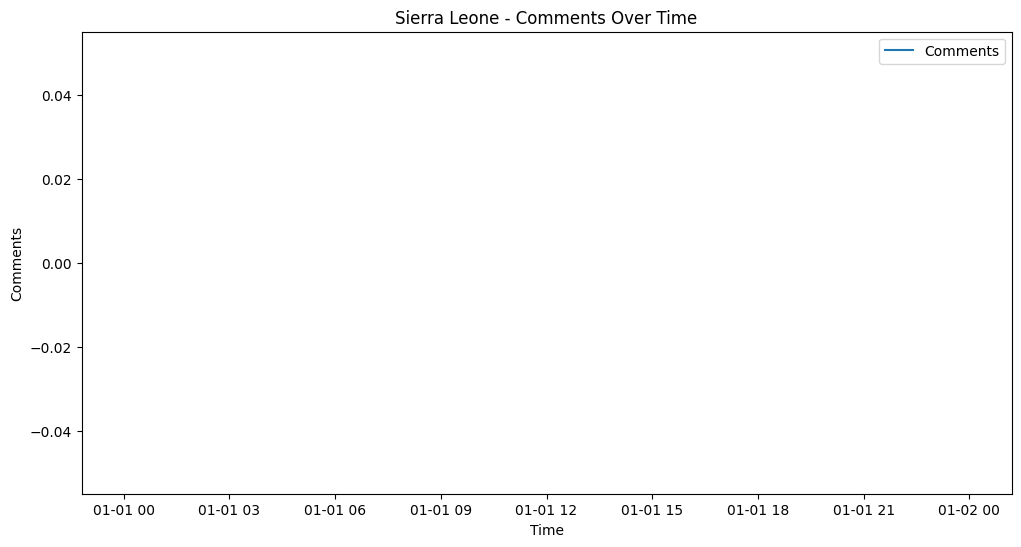

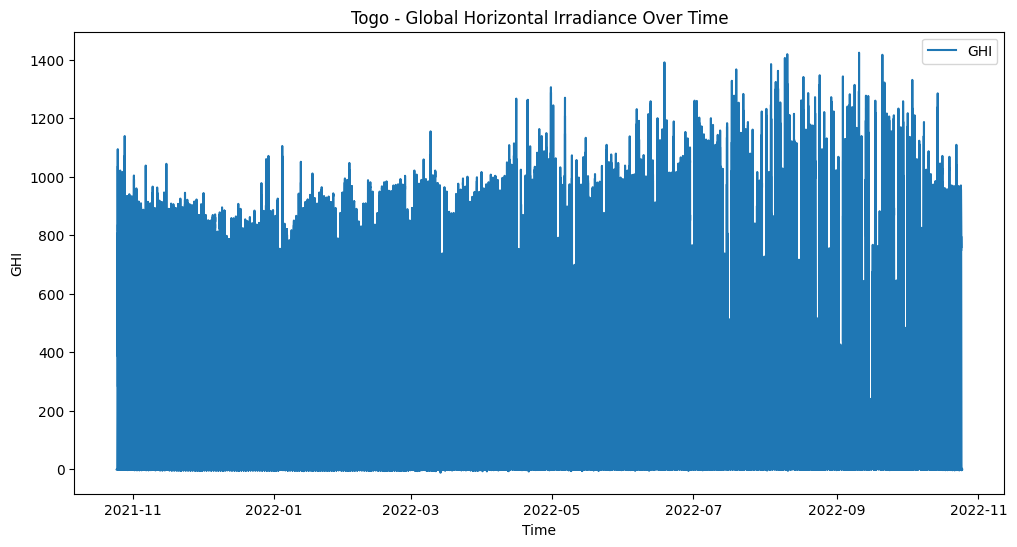

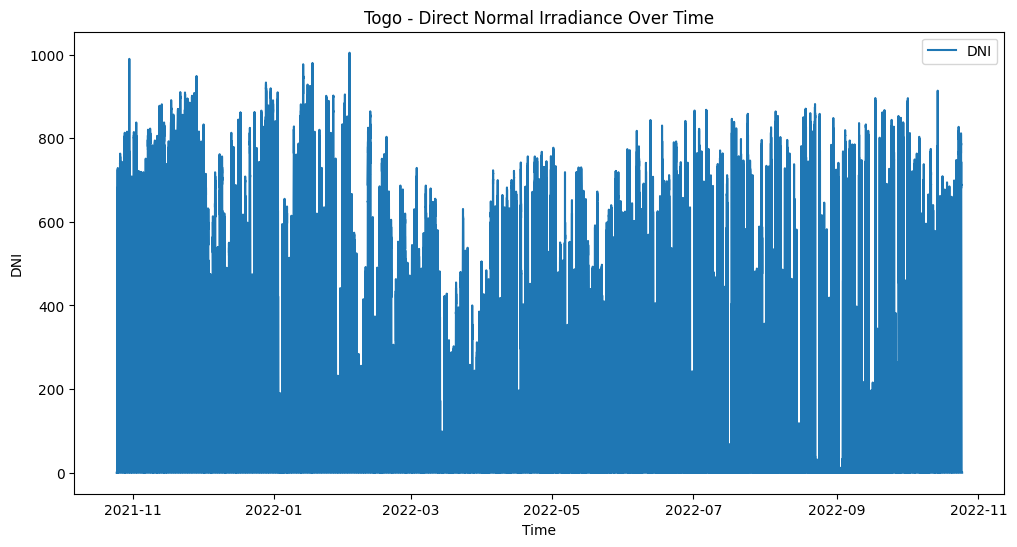

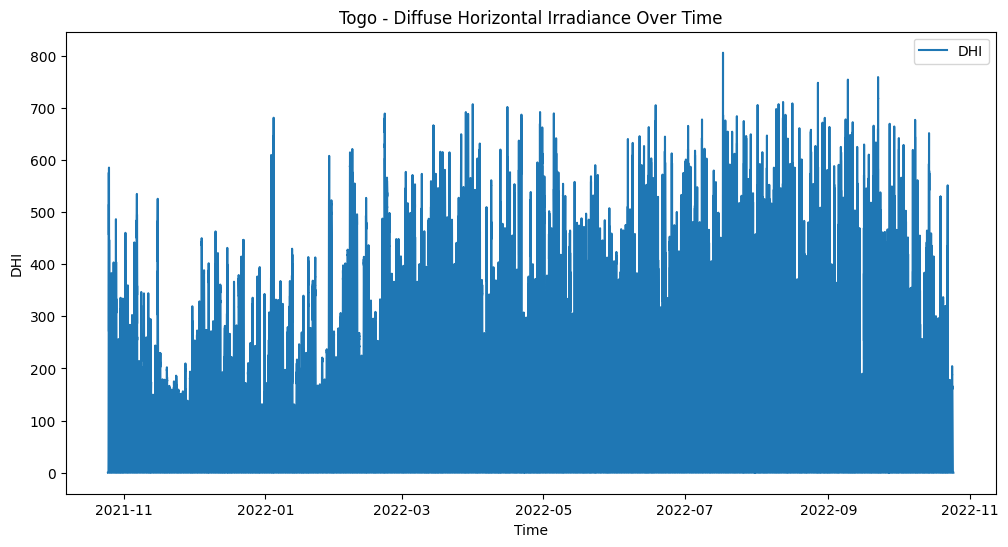

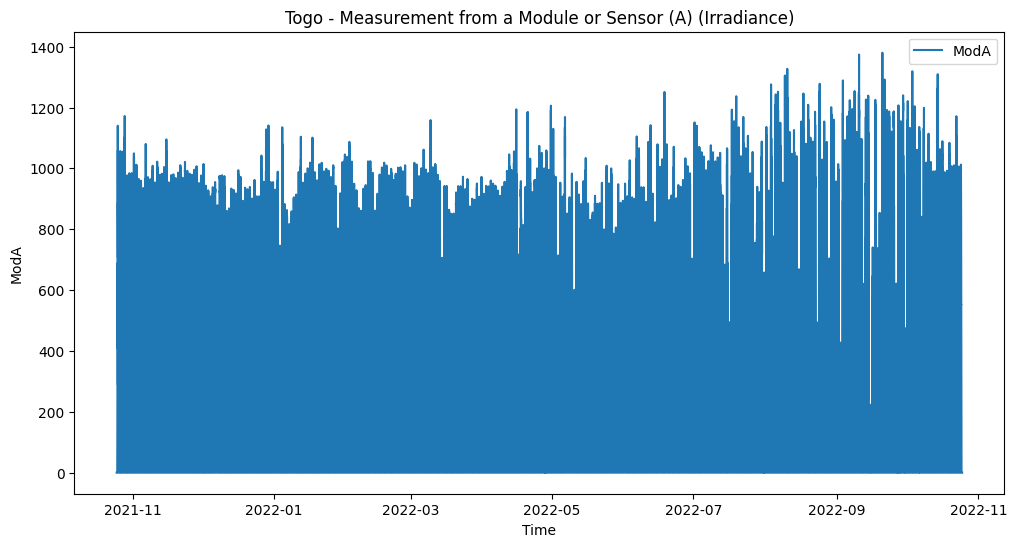

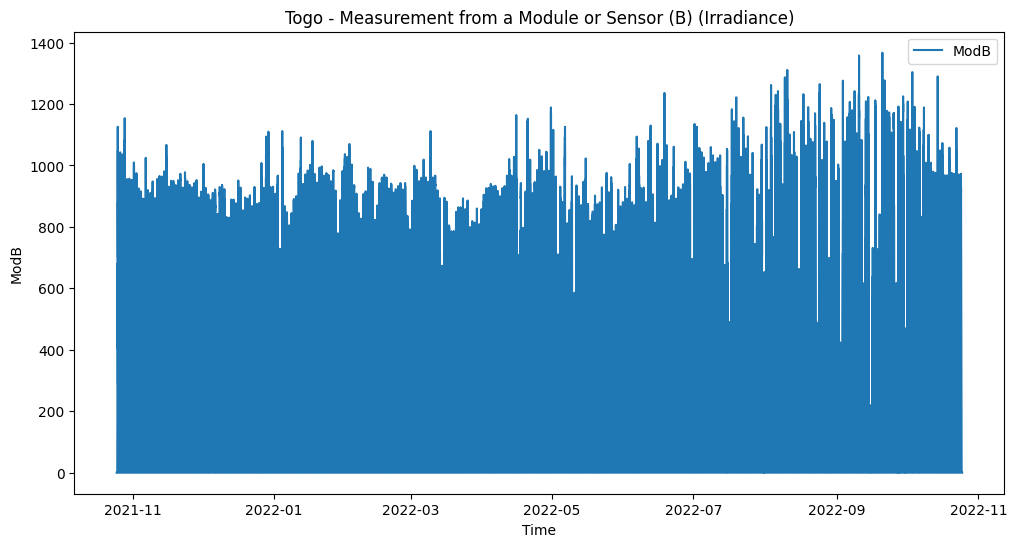

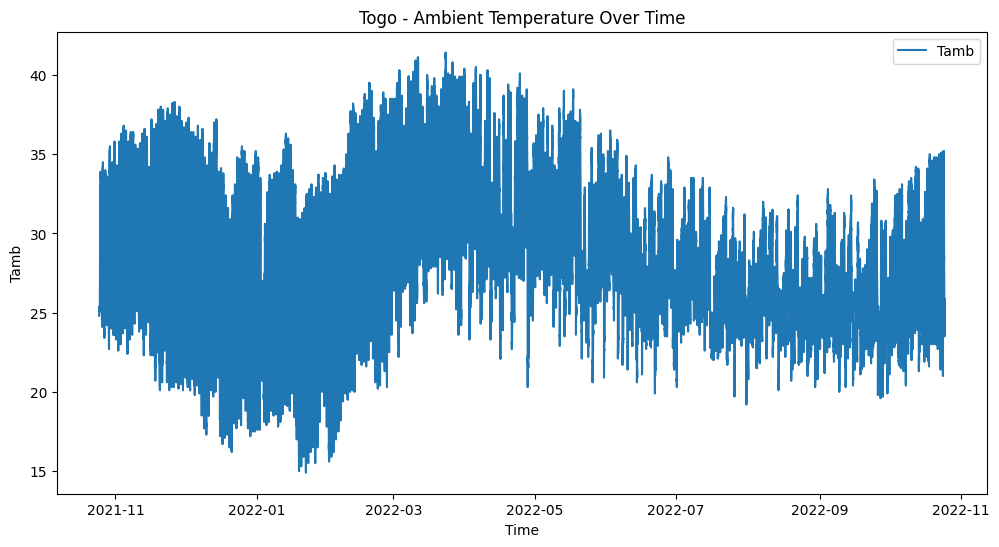

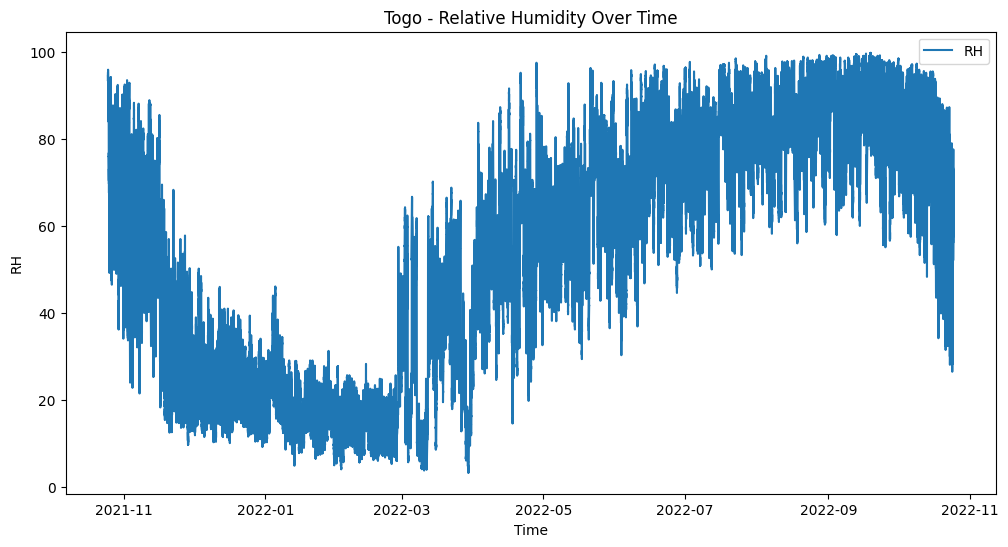

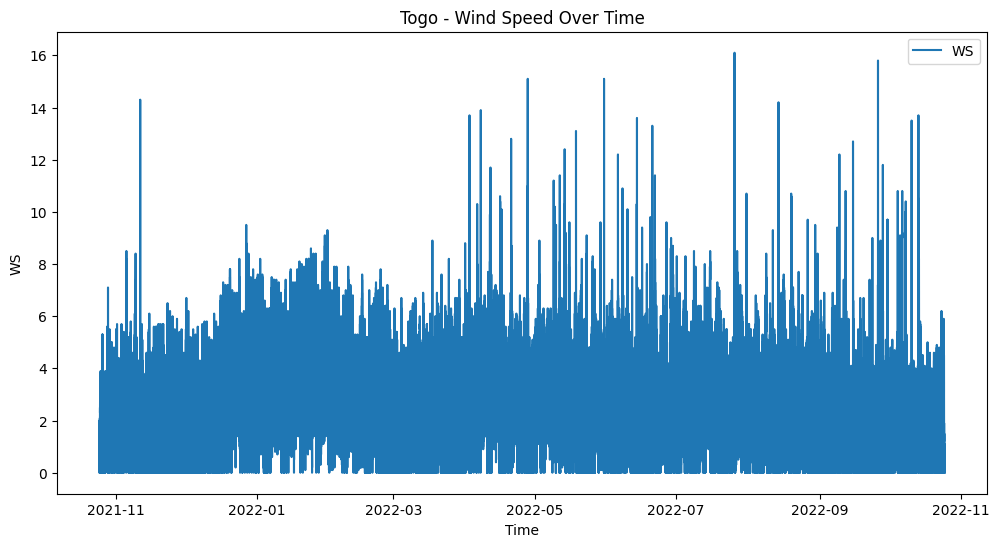

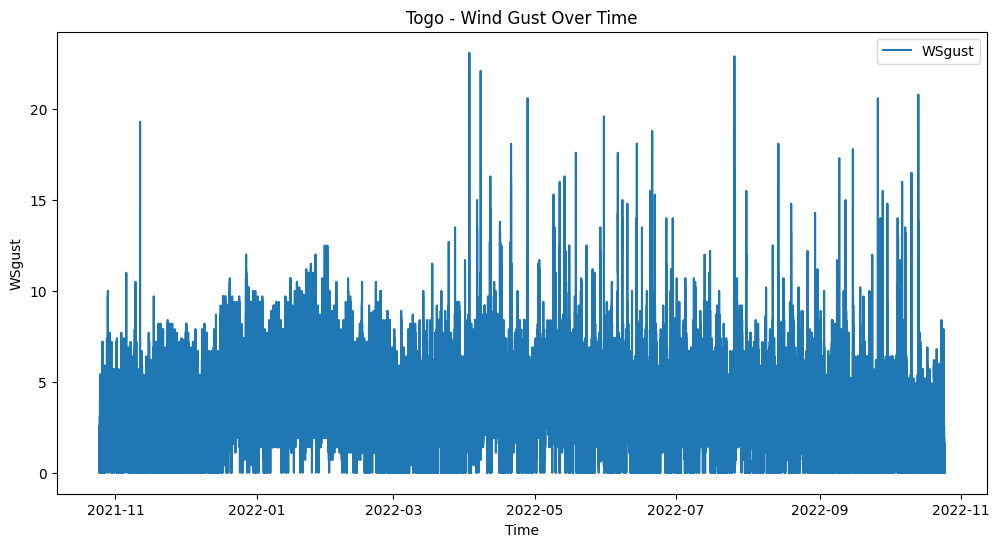

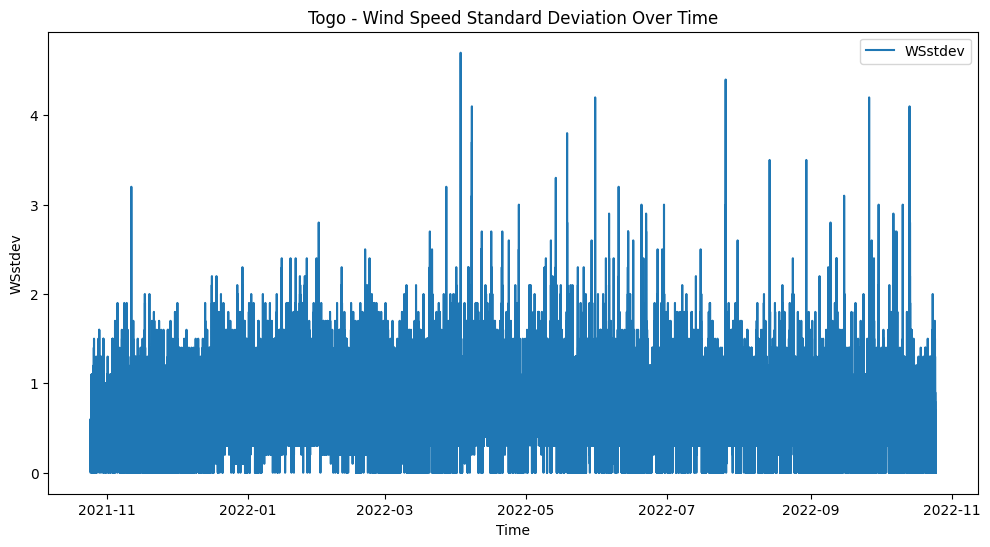

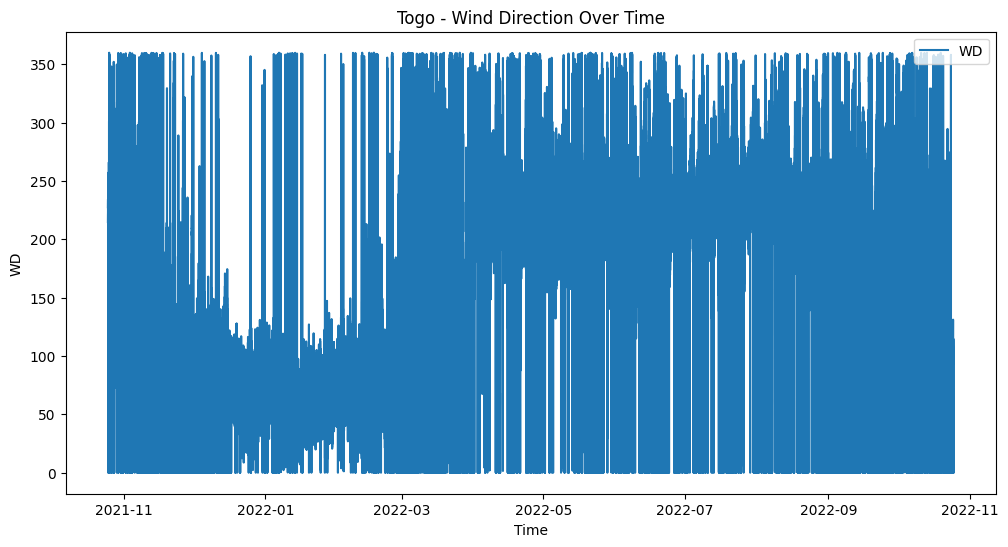

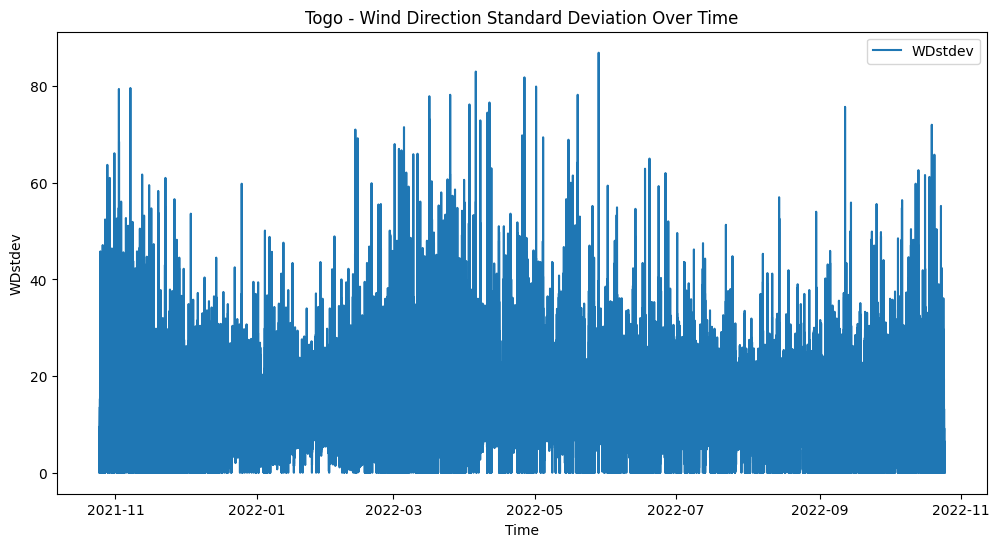

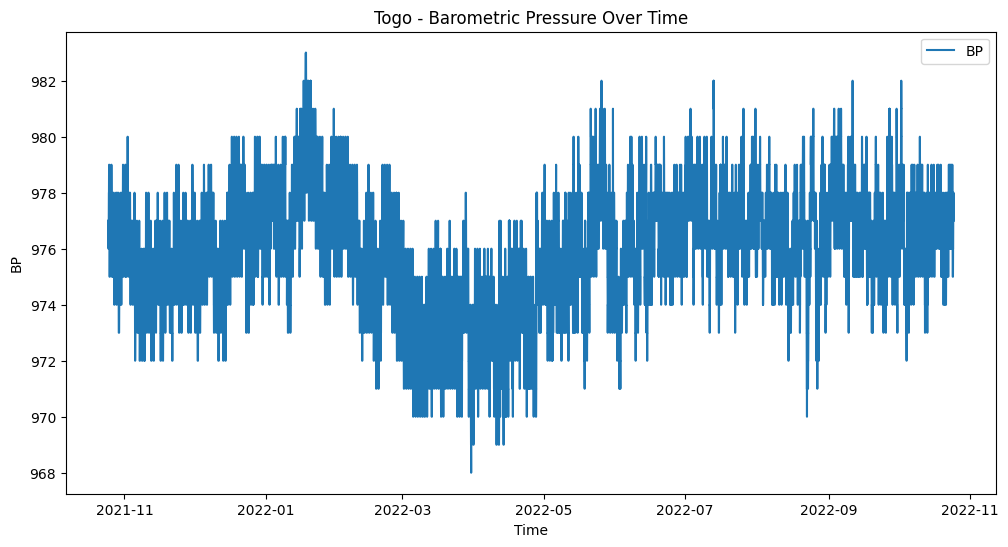

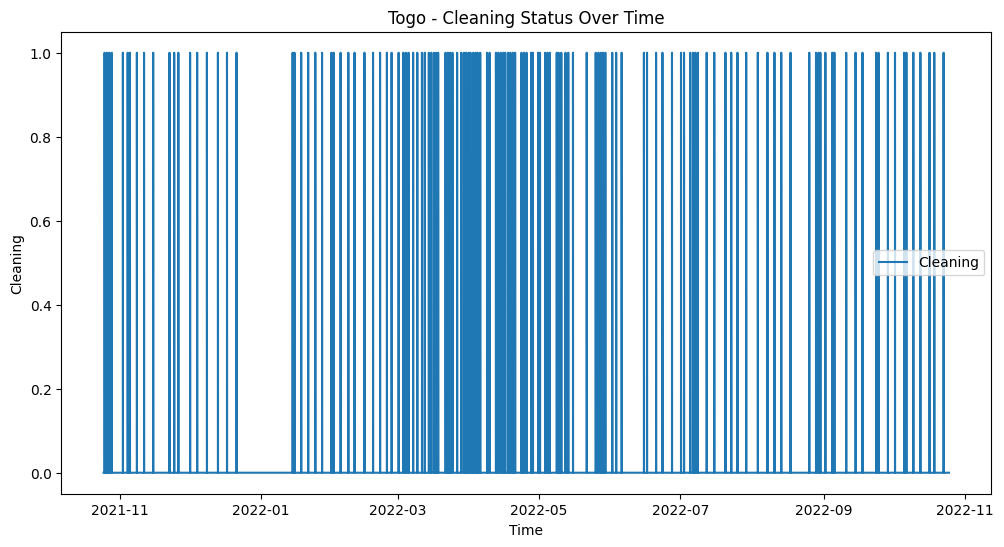

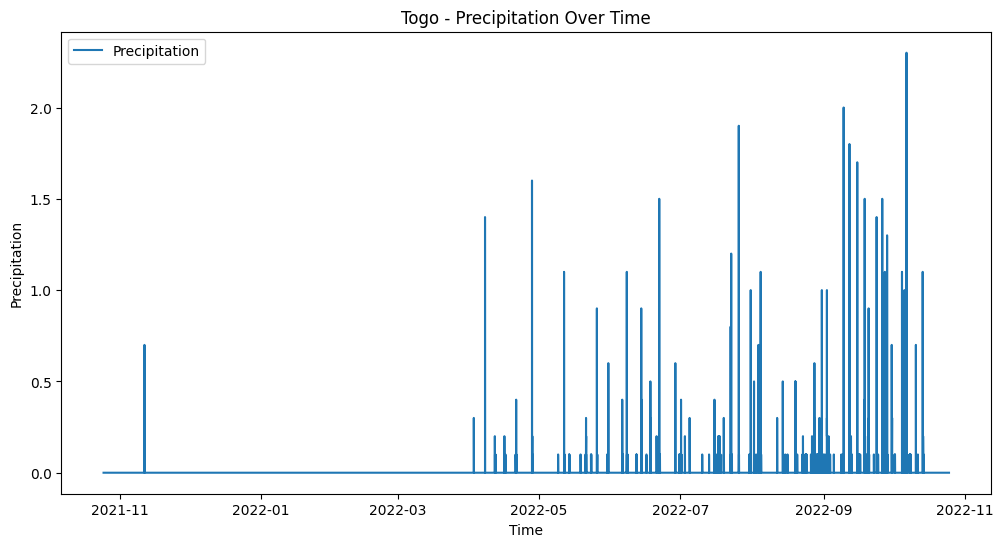

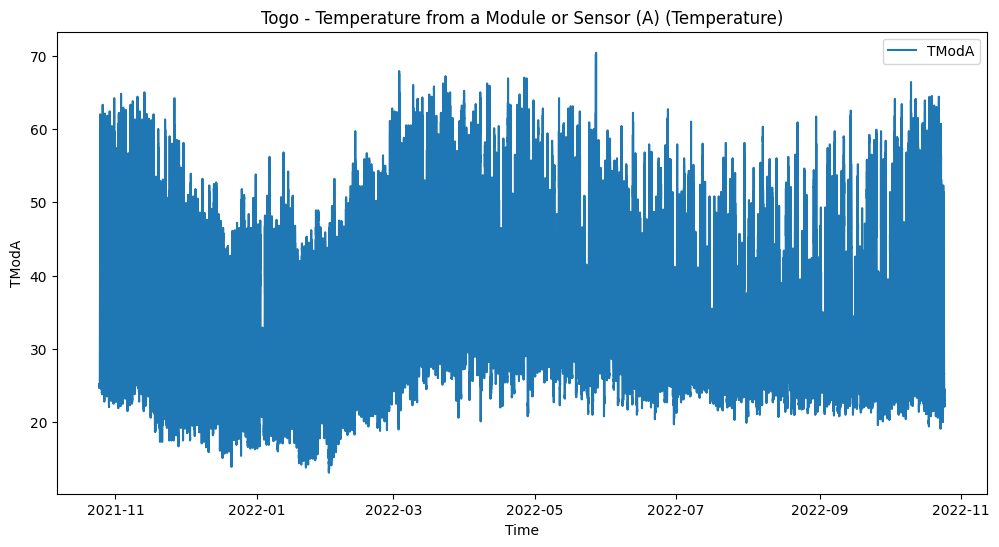

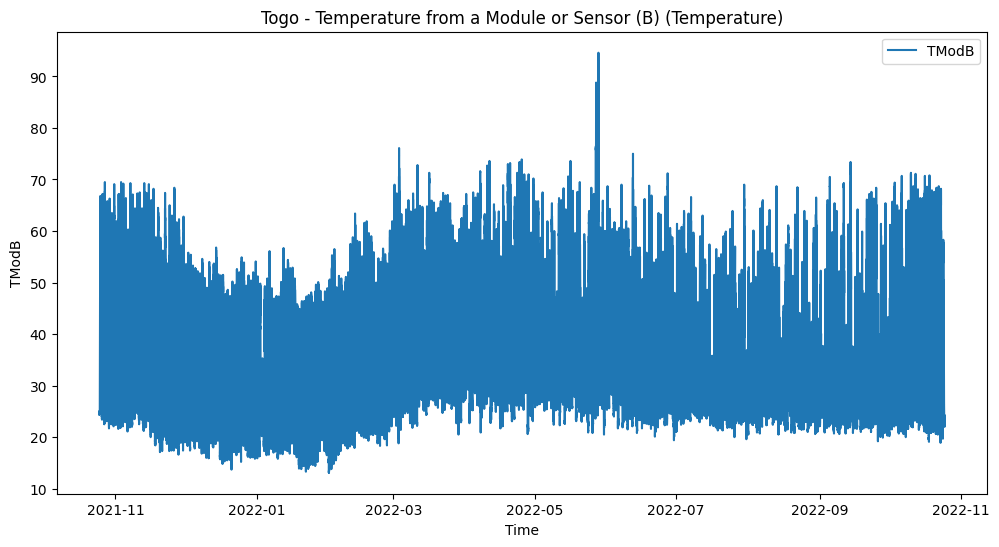

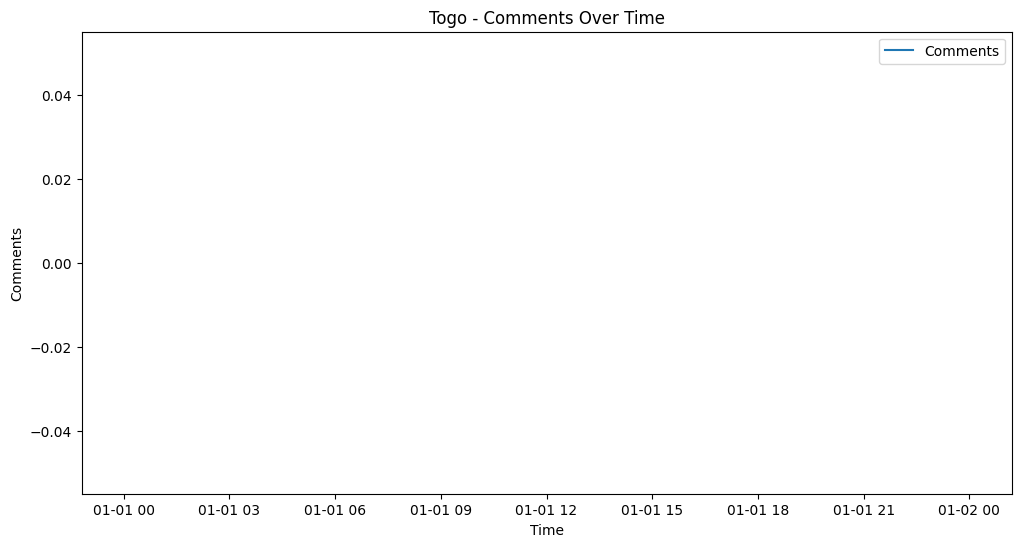

In [23]:
import pandas as pd
import matplotlib.pyplot as plt

benin_data = pd.read_csv('../data/benin-malanville.csv')
sierraleone_data = pd.read_csv('../data/sierraleone-bumbuna.csv')
togo_data = pd.read_csv('../data/togo-dapaong_qc.csv')

# Function to summarize data using pandas' describe() method, which returns summary statistics for all numeric columns by default.
def summarize_data(df):
    return df.describe(include='all')  # 'include=all' to get statistics for all columns

benin_summary = summarize_data(benin_data)
sierraleone_summary = summarize_data(sierraleone_data)
togo_summary = summarize_data(togo_data)

print("Benin Summary Statistics:\n", benin_summary)
print("Sierra Leone Summary Statistics:\n", sierraleone_summary)
print("Togo Summary Statistics:\n", togo_summary)

# Function for data qulity check using pandas isnull() and select_dtypes() method.
def data_quality_check(df):
    missing_values = df.isnull().sum()
    negative_values = df[df.select_dtypes(include='number') < 0].count()
    return missing_values, negative_values

benin_missing, benin_negatives = data_quality_check(benin_data)
sierraleone_missing, sierraleone_negatives = data_quality_check(sierraleone_data)
togo_missing, togo_negatives = data_quality_check(togo_data)

print("Benin Data Quality Check:\n", benin_missing, benin_negatives)
print("Sierra Leone Data Quality Check:\n", sierraleone_missing, sierraleone_negatives)
print("Togo Data Quality Check:\n", togo_missing, togo_negatives)


# Function for Plot line graphs or area plots to observe patterns over time (modified code to include multiple parameters).
import pandas as pd
import matplotlib.pyplot as plt

def plot_time_series_all(df_dict, columns, titles):
    for country, df in df_dict.items():
        df['Timestamp'] = pd.to_datetime(df['Timestamp'])
        for column, title in zip(columns, titles):
            if column in df.columns:
                plt.figure(figsize=(12, 6))
                plt.plot(df['Timestamp'], df[column], label=column)
                plt.title(f'{country} - {title}')
                plt.xlabel('Time')
                plt.ylabel(column)
                plt.legend()
                plt.show()
            else:
                print(f"Column '{column}' not found in {country} data.")

# DataFrames for each country
df_dict = {
    'Benin': benin_data,
    'Sierra Leone': sierraleone_data,
    'Togo': togo_data
}

# Columns to plot
columns = [
    'GHI', 'DNI', 'DHI', 'ModA', 'ModB', 'Tamb', 'RH', 'WS', 'WSgust', 'WSstdev', 'WD', 'WDstdev', 'BP', 'Cleaning', 'Precipitation', 'TModA', 'TModB', 'Comments'
]

# Titles for each column
titles = [
    'Global Horizontal Irradiance Over Time',
    'Direct Normal Irradiance Over Time',
    'Diffuse Horizontal Irradiance Over Time',
    'Measurement from a Module or Sensor (A) (Irradiance)',
    'Measurement from a Module or Sensor (B) (Irradiance)',
    'Ambient Temperature Over Time',
    'Relative Humidity Over Time',
    'Wind Speed Over Time',
    'Wind Gust Over Time',
    'Wind Speed Standard Deviation Over Time',
    'Wind Direction Over Time',
    'Wind Direction Standard Deviation Over Time',
    'Barometric Pressure Over Time',
    'Cleaning Status Over Time',
    'Precipitation Over Time',
    'Temperature from a Module or Sensor (A) (Temperature)',
    'Temperature from a Module or Sensor (B) (Temperature)',
    'Comments Over Time'
]

# Plot time series for each column and country
plot_time_series_all(df_dict, columns, titles)


